Import & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set seaborn style
sns.set(style='whitegrid')


Load the Datasets

In [2]:
# Set paths
movies_path = '../data/raw/tmdb_5000_movies.csv'
credits_path = '../data/raw/tmdb_5000_credits.csv'

# Load the data
movies_df = pd.read_csv(movies_path)
credits_df = pd.read_csv(credits_path)

# Preview
movies_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Basic Info Check

In [3]:
print("Movies DataFrame:")
print(movies_df.shape)
print(movies_df.info())

print("\nCredits DataFrame:")
print(credits_df.shape)
print(credits_df.info())


Movies DataFrame:
(4803, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   objec

Null Values & Duplicates

In [4]:
print("Missing values in movies:")
print(movies_df.isnull().sum())

print("\nMissing values in credits:")
print(credits_df.isnull().sum())

print("\nDuplicates in movies:", movies_df.duplicated().sum())
print("Duplicates in credits:", credits_df.duplicated().sum())


Missing values in movies:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Missing values in credits:
movie_id    0
title       0
cast        0
crew        0
dtype: int64

Duplicates in movies: 0
Duplicates in credits: 0


Merge Datasets (Prep for Later)

In [5]:
# Rename credits 'movie_id' to 'id' to match
credits_df = credits_df.rename(columns={'movie_id': 'id'})

# Merge on 'id'
merged_df = movies_df.merge(credits_df, on='id')

print("Merged shape:", merged_df.shape)
merged_df.head(2)


Merged shape: (4803, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


Drop Unnecessary Columns

In [6]:
merged_df = merged_df.drop(columns=[
    'homepage', 'status', 'spoken_languages', 'tagline', 'original_title'
])


Convert Release Date to DateTime Format

In [7]:
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')


Extract Year from Release Date

In [8]:
merged_df['release_year'] = merged_df['release_date'].dt.year


Convert JSON-like Fields into Real Python Lists

In [9]:
import ast

def extract_names(obj_str):
    try:
        obj = ast.literal_eval(obj_str)
        return [d['name'] for d in obj]
    except (ValueError, SyntaxError):
        return []

# Apply the conversion to relevant columns
merged_df['genres'] = merged_df['genres'].apply(extract_names)
merged_df['keywords'] = merged_df['keywords'].apply(extract_names)
merged_df['production_companies'] = merged_df['production_companies'].apply(extract_names)


Extract Top Cast and Director

In [10]:
def get_top_cast(cast_str):
    try:
        cast_list = ast.literal_eval(cast_str)
        return [cast['name'] for cast in cast_list[:3]]
    except (ValueError, SyntaxError):
        return []

def get_director(crew_str):
    try:
        crew_list = ast.literal_eval(crew_str)
        for member in crew_list:
            if member['job'] == 'Director':
                return member['name']
        return None
    except (ValueError, SyntaxError):
        return None

# Apply functions to relevant columns
merged_df['top_cast'] = merged_df['cast'].apply(get_top_cast)
merged_df['director'] = merged_df['crew'].apply(get_director)


Handle Missing Data

In [11]:
merged_df = merged_df.dropna(subset=['release_date', 'budget', 'revenue', 'runtime'])


Review

In [15]:
# Rename 'title_x' to 'title' and drop 'title_y'
merged_df.rename(columns={'title_x': 'title'}, inplace=True)
merged_df.drop(columns=['title_y'], inplace=True)


In [16]:
merged_df[['title', 'genres', 'top_cast', 'director', 'budget', 'revenue', 'release_year']].head(5)


,title,genres,top_cast,director,budget,revenue,release_year
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,237000000,2787965087,2009.0
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,300000000,961000000,2007.0
2,Spectre,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,245000000,880674609,2015.0
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,250000000,1084939099,2012.0
4,John Carter,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,260000000,284139100,2012.0


EDA Steps:

Descriptive Statistics

In [17]:
merged_df.describe()


,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year
count,4.800000e+03,4800.000000,4800.000000,4800,4.800000e+03,4800.000000,4800.000000,4800.000000,4800.000000
mean,2.906007e+07,56949.011667,21.505569,2002-12-26 00:29:24,8.231205e+07,106.898125,6.094458,690.646875,2002.463542
min,0.000000e+00,5.000000,0.000372,1916-09-04 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1916.000000
25%,8.000000e+05,9012.750000,4.682212,1999-07-12 18:00:00,0.000000e+00,94.000000,5.600000,54.000000,1999.000000
50%,1.500000e+07,14623.500000,12.928897,2005-09-30 12:00:00,1.918199e+07,103.000000,6.200000,236.000000,2005.000000
75%,4.000000e+07,58512.500000,28.350628,2011-02-14 12:00:00,9.293886e+07,118.000000,6.800000,737.250000,2011.000000
max,3.800000e+08,447027.000000,875.581305,2017-02-03 00:00:00,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000
std,4.073029e+07,88292.839372,31.822163,NaN,1.628950e+08,22.561593,1.188366,1234.852449,12.414304


Data Distribution

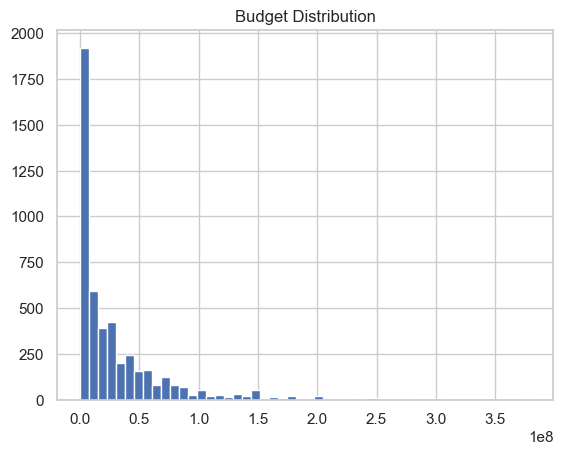

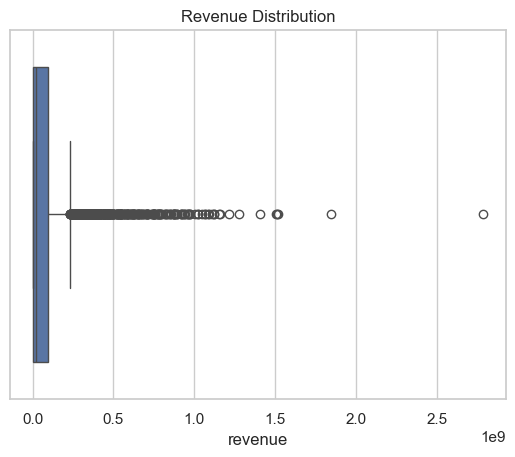

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms
merged_df['budget'].hist(bins=50)
plt.title('Budget Distribution')
plt.show()

# Boxplot for revenue
sns.boxplot(x=merged_df['revenue'])
plt.title('Revenue Distribution')
plt.show()


Missing Data Visualization

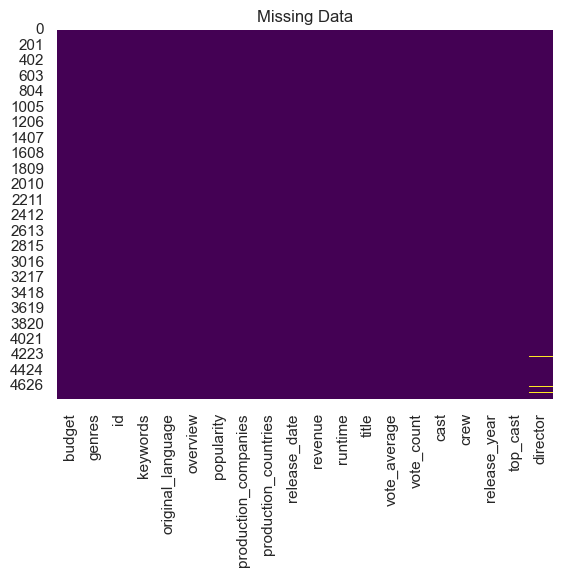

In [19]:
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data')
plt.show()


Correlation Matrix

In [22]:
merged_df['release_year'] = merged_df['release_year'].astype('int')


In [23]:
numeric_cols = merged_df.select_dtypes(include=['number']).columns
corr_matrix = merged_df[numeric_cols].corr()


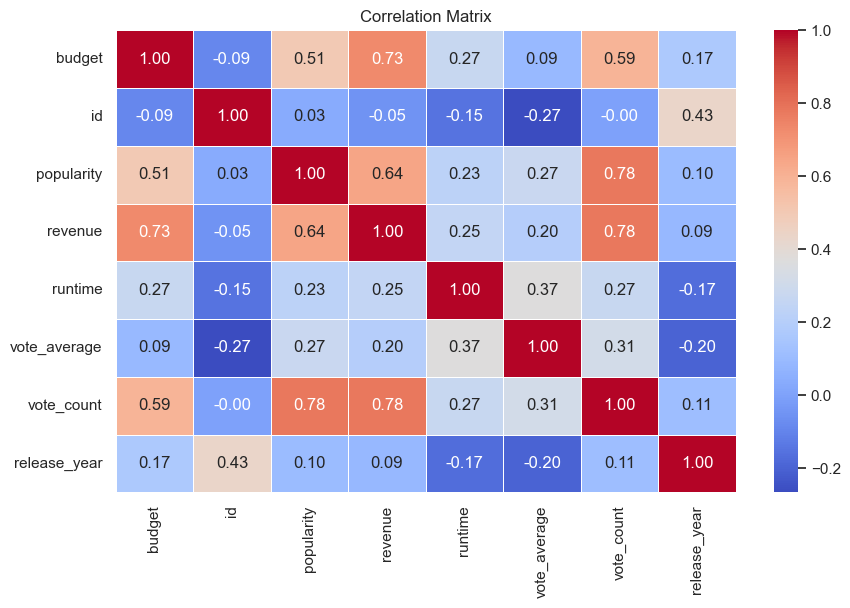

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



Categorical Features Analysis

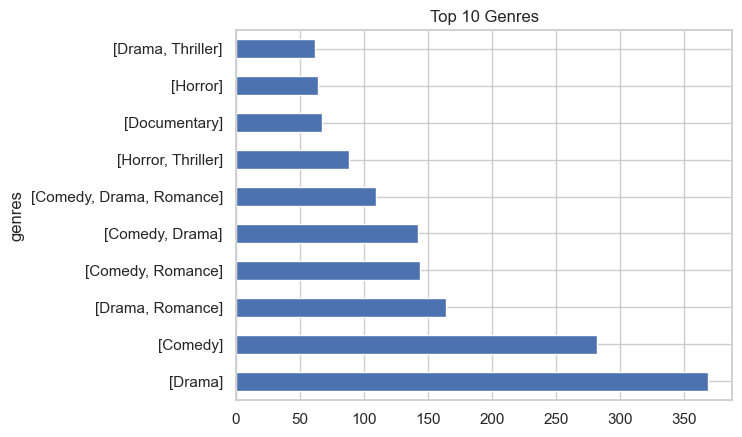

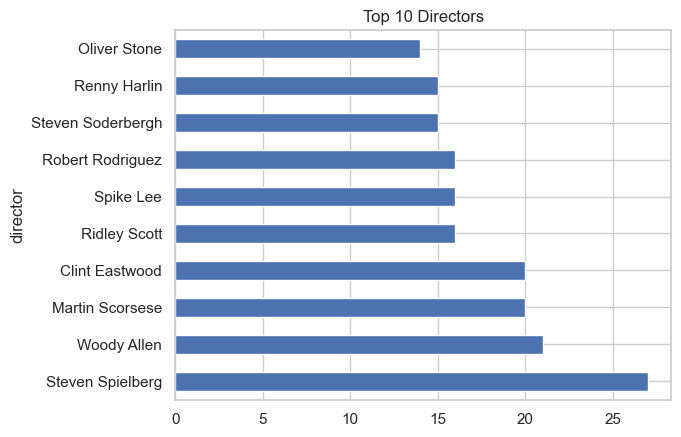

In [26]:
# Plotting top 10 genres
genre_counts = merged_df['genres'].value_counts().head(10)
genre_counts.plot(kind='barh')
plt.title('Top 10 Genres')
plt.show()

# Top 10 Directors
director_counts = merged_df['director'].value_counts().head(10)
director_counts.plot(kind='barh')
plt.title('Top 10 Directors')
plt.show()



Outlier Detection

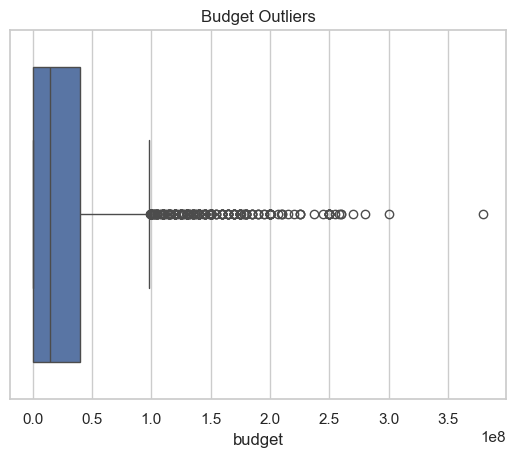

In [27]:
sns.boxplot(x=merged_df['budget'])
plt.title('Budget Outliers')
plt.show()


Time-based Analysis

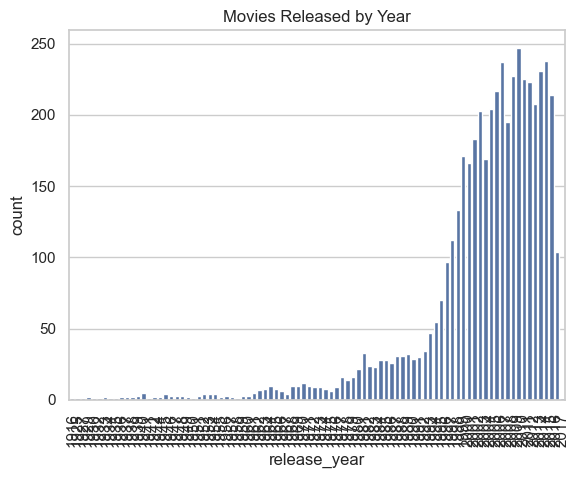

In [28]:
sns.countplot(x='release_year', data=merged_df)
plt.title('Movies Released by Year')
plt.xticks(rotation=90)
plt.show()


Profit

In [29]:
merged_df['profit'] = merged_df['revenue'] - merged_df['budget']


Return on Investment (ROI)

In [30]:
# Avoid division by zero
merged_df['roi'] = merged_df.apply(lambda row: (row['revenue'] - row['budget']) / row['budget'] if row['budget'] != 0 else 0, axis=1)


Movie Age

In [31]:
from datetime import datetime
current_year = datetime.now().year
merged_df['movie_age'] = current_year - merged_df['release_year']


Is English? (Binary Flag)

In [32]:
merged_df['is_english'] = merged_df['original_language'].apply(lambda x: 1 if x == 'en' else 0)


Log Revenue / Log Budget (handle skewed distributions)

In [33]:
import numpy as np

# Add 1 to avoid log(0)
merged_df['log_revenue'] = merged_df['revenue'].apply(lambda x: np.log1p(x))
merged_df['log_budget'] = merged_df['budget'].apply(lambda x: np.log1p(x))


Distribution Plots for:

1. Distribution Plots for:
profit

roi

log_budget vs log_revenue

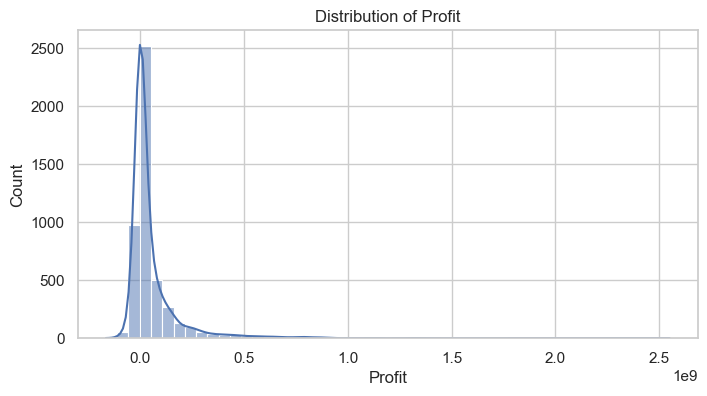

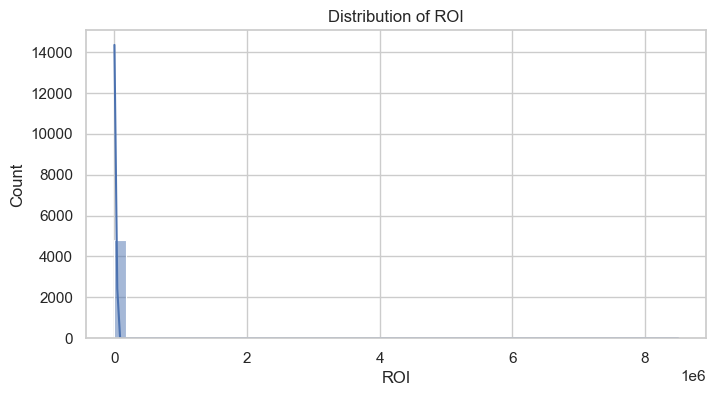

In [34]:
# Profit Distribution
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['profit'], bins=50, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.show()

# ROI Distribution
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['roi'], bins=50, kde=True)
plt.title('Distribution of ROI')
plt.xlabel('ROI')
plt.ylabel('Count')
plt.show()

Scatter Plot: Budget vs Revenue (Log Scale)

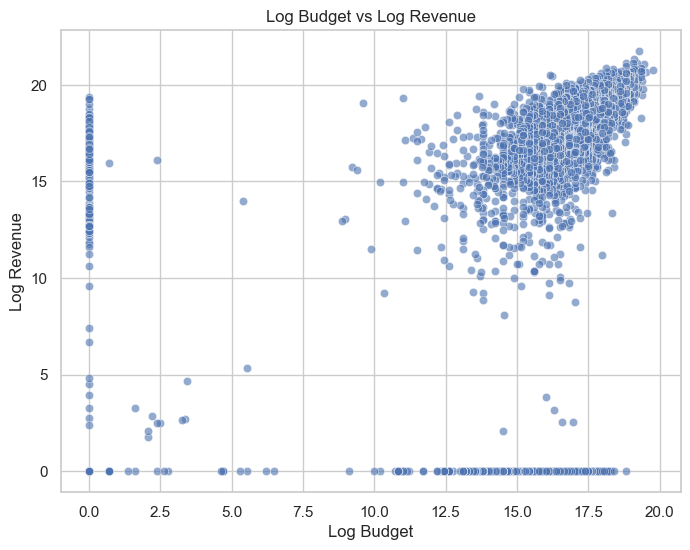

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='log_budget', y='log_revenue', alpha=0.6)
plt.title('Log Budget vs Log Revenue')
plt.xlabel('Log Budget')
plt.ylabel('Log Revenue')
plt.show()


Box Plot: Revenue by Language

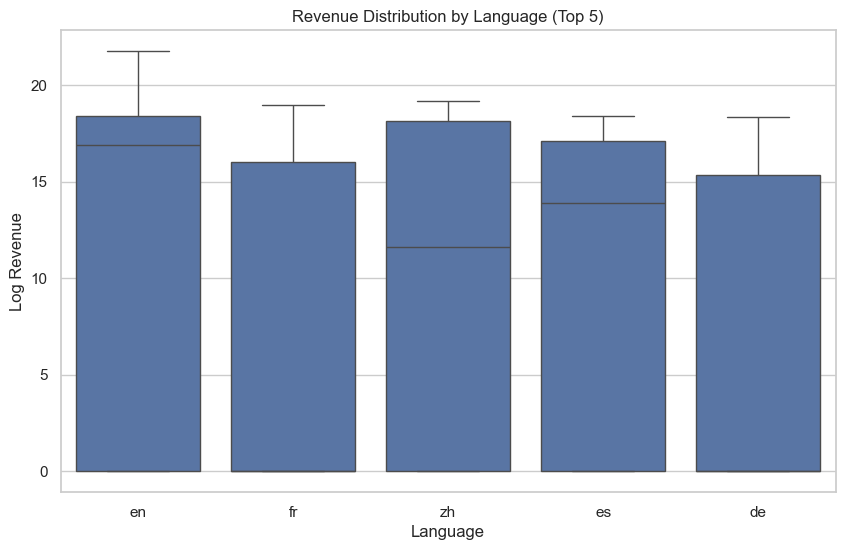

In [36]:
top_langs = merged_df['original_language'].value_counts().head(5).index.tolist()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df['original_language'].isin(top_langs)],
            x='original_language', y='log_revenue')
plt.title('Revenue Distribution by Language (Top 5)')
plt.xlabel('Language')
plt.ylabel('Log Revenue')
plt.show()


Select Features + Target

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Choose your features
features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_year']
X = merged_df[features]
y = merged_df['revenue']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Linear Regression Model

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Evaluate the Model

In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 6113880786876466.0
R² Score: 0.7701176988911713


Plot Predictions vs Actual

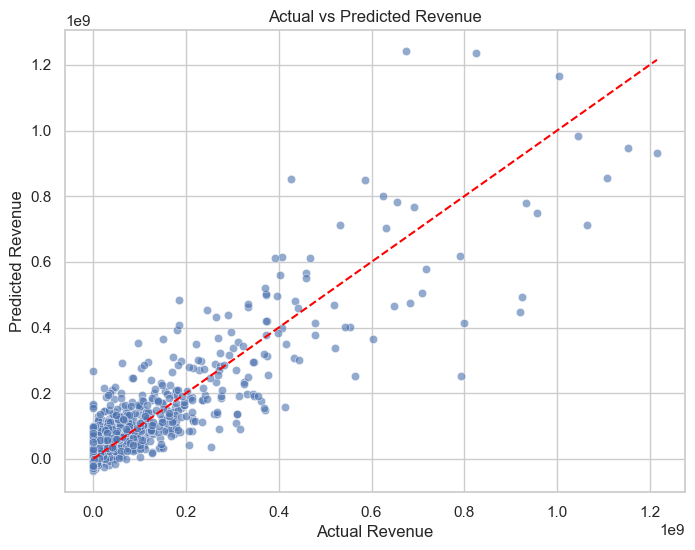

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()


Step 1: Double-check for Data Leakage

In [42]:
print(X.columns)


Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count',
       'release_year', 'profit', 'roi'],
      dtype='object')
